<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/Copy_of_AWS_Part_II_Day_11_Final_Projects_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #11: Final Projects**
---

### **Description**
In today's notebook, you will apply what you have learned throughout Part 2, particularly with regards to Deep Learning and Natural Language Processsing, to several projects in order to reinforce these skills.

<br>

### **Lab Structure**
**Part 1**: [Heart Attack Predictor](#p1)

**Part 2**: [Amazon Review Sentiment Analysis](#p2)

**Part 3**: [Semantic Segmentation with U-Net](#p3)

**Part 4**: [Generating Wikipedia Entries](#p4)


<br>

### **Goals**
By the end of this lab, you will have honed the skills you have learned throughout the program and started to see how you could extend them to more complex situations.

<br>

### **Cheat Sheets**
[EDA with pandas](https://docs.google.com/document/d/1l4okgxSG1JVI1Mrf25I2BhDhf7o-D_5686iuSTJ73cc/edit?usp=share_link)

[Data Visualization with matplotlib](https://docs.google.com/document/d/1DpJKbkS_jNTQSnL-nhJPUfvYTQRblH_XybUXLMbFIXg/edit?usp=share_link)

[Deep Learning with PyTorch for CNNs](https://docs.google.com/document/d/19pic-8qY5FnxJZ6GgkUhUjchFiXBzjeogTQwh-htgik/edit)

[Natural Language Processing II](https://docs.google.com/document/d/1YWm6GEFlRZey8Z4PA-Xu5r0ll3N7eLXEueyp9yC6jsE/edit?usp=sharing)

[Natural Language Processing III](https://docs.google.com/document/d/1QuY0qdG7ICkmsOtShIpyffgYd_EAXjDm86EEzKK5t9s/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
!pip install --quiet lime

import os
import random
from random import choices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from fastai.vision.all import *
from fastai.text.all import *
from fastai.optimizer import Adam

import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

from lime import lime_text
import re

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0

<a name="p1"></a>

---
## **Part 1: Heart Attack Predictor**
---

Your goal in this section is to use KNN and a neural network to predict whether a given patient is likely to have a heart attack or not. Specifically, the dataset has:

* **Features**: `'age'`, `'sex'`, `'cp'`, `'trestbps'`, `'chol'`, `'fbs'`, `'restecg'`, `'thalach'`, `'exang'`, `'oldpeak'` that describe a variety of health statistics taken by doctors for a given patient.

* **Target**: `'heart attack'` which is 0 if the patient has not had a heart attack and 1 if the patient has had a heart attack.


<br>

**Run the code provided below to import the dataset and split into training and test sets.**

In [ ]:
# Load the data into a DataFrame
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSa0metcKBFqn-MHLn05vVGWONMlzljcWa-xIM1wJPXIa5kbrmIzGqmWcMh8eKG_ntByF9qqn6Mx3MT/pub?gid=1052859518&single=true&output=csv'
df = pd.read_csv(url)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop(columns = 'heart attack'),
    df['heart attack'],
    test_size = 0.2,
    random_state = 42)

# Define a custom function for creating a DataLoader from features and target data
def create_dataloader(X,y):
  X_tensor = torch.tensor(X.to_numpy(), dtype=torch.float32)
  y_tensor = torch.tensor(y.to_numpy(), dtype=torch.float32).unsqueeze(1)
  dataset = list(zip(X_tensor, y_tensor))
  dl = DataLoader(dataset, batch_size=64, shuffle=True)
  return dl

# Define the DataLoaders
train_dl = create_dataloader(X_train, y_train)
valid_dl = create_dataloader(X_valid, y_valid)
dls = DataLoaders(train_dl, valid_dl)

# Define DataLoaders for female subset
train_dl_female = create_dataloader(
    X_train[X_train['sex']==0],
    y_train[X_train['sex']==0])
valid_dl_female = create_dataloader(
    X_valid[X_valid['sex']==0],
    y_valid[X_valid['sex']==0])
dls_female = DataLoaders(train_dl_female, valid_dl_female)

# Define DataLoaders for male subset
train_dl_male = create_dataloader(
    X_train[X_train['sex']==1],
    y_train[X_train['sex']==1])
valid_dl_male = create_dataloader(
    X_valid[X_valid['sex']==1],
    y_valid[X_valid['sex']==1])
dls_male = DataLoaders(train_dl_male, valid_dl_male)

#### **Problem #1.1: Use a KNN classifier**


Train a KNN model to perform this task. Try multiple values of K (`n_neighbors`) to achieve the highest performance you can on the training and validation data.

In [ ]:
# Define the KNN Classifier


# Train the model


# Make predictions
y_pred = # COMPLETE THIS LINE

train_accuracy = accuracy_score(y_train, # COMPLETE THIS LINE
valid_accuracy = accuracy_score(# COMPLETE THIS LINE

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {valid_accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_valid, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Problem #1.2: Use a fully connected neural network**

Train a fully connected network to perform this task. Change model architechure and hyperparameters to improve the model. What's the highest accuracy you are able to achieve on the validation set?

In [ ]:
# Define binary accuracy
def binary_accuracy(y_pred, y_true):
    # Output 0 if y_pred <= 0.5 and 1 if y_pred is > 0.5
    y_pred = (y_pred.squeeze() > 0.5).float()
    # Returns accuracy
    return (y_pred == y_true).float().mean()


# Step #2: Determine the input dimensions
input_size = # COMPLETE THIS LINE

# Steps #3-6: Build your neural net
model = # COMPLETE THIS LINE

# Step #7: Train the model
loss_func = BCELossFlat()
learn = # COMPLETE THIS LINE


# Calculate training accuracy
train_loss, train_accuracy = learn.validate(# COMPLETE THIS LINE
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(# COMPLETE THIS LINE
print(f"Validation accuracy: {valid_accuracy:.4f}")


#### **Reflection Questions**
* Which of your models performed better?
* Does deep learning always outperform traditional ML?
* What kinds of problems are best-suited for deep learning?

In [ ]:
'''
# WRITE YOUR RESPONSES HERE
''';

#### **Problem #1.3: Evaluate for Females and Males Separately**


Now, evaluate both of your models for females and males separately to see if there's any difference in the performance of your high performing models. You can just print the validation accuracy.

##### **1. Evaluate KNN for Female vs. Male.**

In [ ]:
female_rows = X_valid['sex']==0
male_rows = # COMPLETE THIS LINE

female_preds = knn.predict(X_valid[female_rows])
male_preds = # COMPLETE THIS LINE

accuracy_female = accuracy_score(y_valid[female_rows], # COMPLETE THIS LINE
accuracy_male = accuracy_score( # COMPLETE THIS LINE
print(f"Female validation accuracy: {accuracy_female:.4f}")
print(f"Male validation accuracy: {accuracy_male:.4f}")

##### **2. Evaluate NN for Female vs. Male.**

**NOTE**: We have already created a separated female and male train and validation data loader that you can use called: `train_dl_female`, `valid_dl_female`, `train_dl_male`, and `valid_dl_male`.

In [ ]:
# Calculate female training and validation accuracy
_, train_accuracy_female = learn.validate(# COMPLETE THIS LINE
print(f"Female training accuracy: {train_accuracy_female:.4f}")

_, valid_accuracy_female = learn.validate(# COMPLETE THIS LINE
print(f"Female validation accuracy: {valid_accuracy_female:.4f}")


# Calculate male training and validation accuracy
_, train_accuracy_male = learn.validate(# COMPLETE THIS LINE
print(f"Male training accuracy: {train_accuracy_male:.4f}")

_, valid_accuracy_male = learn.validate(# COMPLETE THIS LINE
print(f"Male validation accuracy: {valid_accuracy_male:.4f}")

#### **Problem #1.4: Examine why**


You likely saw a noticeable difference in the performance between females and males for both models. Examine why this might be by doing the following:

1. Plot a bar chart of the number of males vs. females in this data.
2. Plot a grouped bar chart of the number of males and females that did not have a heart attack vs. those that did.

##### **1. Plot a bar chart of the number of males vs. females in this data.**

In [ ]:
plt.bar(['Female', 'Male'], df['sex'].# COMPLETE THIS LINE

# COMPLETE THIS CODE

##### **2. Plot a grouped bar chart of the number of males and females that did not have a heart attack vs. those that did.**

In [ ]:
df_female = df[df['sex'] == 0]
df_male = df[df['sex'] == 1]

plt.bar([-0.1, 0.9], # COMPLETE THIS LINE
plt.bar([0.1, 1.1], # COMPLETE THIS LINE

plt.xticks(ticks = [0, 1], labels = ['No Heart Attack', 'Heart Attack'], fontsize = 'x-large')
plt.title('Breakdown of Heart Attacks by Sex', fontsize = 'x-large')
plt.legend()
plt.show()

#### **Problem #1.5: What if we blind the models to this variable?**


A common approach to avoid bias is to take a "blind" approach, in which we remove the biased variable from the equation. In this case, we'll do that by training new models using data without the `'sex'` column. Specifically,

1. Train and evaluate an KNN Classifier on the blind data.
2. Train and evaluate a NN on the blind data.

In both cases, evaluate the models separately on the female and male rows just as you did in Problem #3.

<br>

**Run the code below before starting to create the blind data.**

In [ ]:
X_train_blind = X_train.drop(columns=['sex'])
X_valid_blind = X_valid.drop(columns=['sex'])

##### **1. Train and evaluate a KNN Classifier on the blind data.**

##### **2. Train and evaluate a neural net on the blind data.**

First, run the cell below to set up the dataloaders.


In [ ]:
train_dl_blind = create_dataloader(X_train_blind, y_train)
valid_dl_blind = create_dataloader(X_valid_blind, y_valid)
dls_blind = DataLoaders(train_dl_blind, valid_dl_blind)

In [ ]:
# Define input size
input_size = # COMPLETE THIS LINE

# Define the neural network architecture
model_blind = nn.Sequential(
    # BUILD YOUR MODEL HERE
)

# Define the Learner
learn_blind = Learner(dls_blind,
                model_blind,
                loss_func=loss_func,
                metrics=binary_accuracy,
                opt_func=Adam)


# Train the model


# Calculate overall training and validation accuracy


# Calculate female training and validation accuracy


# Calculate male training and validation accuracy


### **Potential Future Work**
---

This is an unfortunately common case of biased data, specifically *unbalanced data*, leading to potentially harmful results. The attempt at blinding the models to the sex of the patient likely provided little to no help. Oftentimes, bias runs deeper than the most obvious variables and may be correlated with others in ways that humans and especially advanced ML algorithms can still pick up on. Consider some of the following ideas for improving on these results:

* Training models separately for male and female and data.

* Using a statistical methods for balancing the data. For instance, upsampling and downsampling are common first approaches to tackling this problem.

* Find a dataset that is more balanced to begin with. In an ideal world, we would make sure that the data is balanced (representative) upon collection.

<a name="p2"></a>

---
## **Part 2: Amazon Review Analysis**
---

Your goal in this section is to use a neural network to predict the satisfaction of a customer based on their rating from 0.5 to 5. You can use a model of your choice. This is a difficult dataset, what's the highest accuracy you are able to achieve?

We will provide a column of the dataframe with text with stopwords removed. You can use either the 'text' or the 'text_without_stopwords' for your model.

<br>

**Run the code provided below to import the dataset.**

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT3fAwK4iEaWvsgy5XjbbwVxyzVpQj3En2hk7hO9D5giyk8zvx9xfOP0aU4o9p0ujvaeV4Tcfi-JnyN/pub?gid=103697572&single=true&output=csv')
df['text'] = df['title'] + ' ' + df['review']

# Define stopwords
import sklearn.feature_extraction.text as text
stop = text.ENGLISH_STOP_WORDS

# Remove stopwords from text column
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]) if isinstance(x, str) else x)

# Show the results
df[['text', 'text_without_stopwords','rating']].head(2)

,text,text_without_stopwords,rating
0,Stuning even for the non-gamer This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^,Stuning non-gamer This sound track beautiful! It paints senery mind I recomend people hate vid. game music! I played game Chrono Cross games I played best music! It backs away crude keyboarding takes fresher step grate guitars soulful orchestras. It impress cares listen! ^_^,4.5
1,"The best soundtrack ever to anything. I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.","The best soundtrack anything. I'm reading lot reviews saying best 'game soundtrack' I figured I'd write review disagree bit. This opinino Yasunori Mitsuda's ultimate masterpiece. The music timeless I'm listening years beauty simply refuses fade.The price tag pretty staggering I say, going buy cd money, I feel worth penny.",4.5


In [ ]:
df.iloc[3:5]

,rating,title,review,text,text_without_stopwords
3,3.5,Excellent Soundtrack,"I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and Radical Dreamers - Uns...","Excellent Soundtrack I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and R...","Excellent Soundtrack I truly like soundtrack I enjoy video game music. I played game music I enjoy it's truly relaxing peaceful.On disk one. favorites Scars Of Time, Between Life Death, Forest Of Illusion, Fortress Ancient Dragons, Lost Fragment, Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners Fate, Gale, girlfriend likes ZelbessDisk Three: The best three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, Radical Dreamers - Unstealable Jewel.Overall, excellent soundtrack brought like video game ..."
4,4.0,"Remember, Pull Your Jaw Off The Floor After Hearing it","If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper.","Remember, Pull Your Jaw Off The Floor After Hearing it If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper.","Remember, Pull Your Jaw Off The Floor After Hearing If you've played game, know divine music is! Every single song tells story game, it's good! The greatest songs doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, Sea Radical Dreamers: Unstolen Jewel. (Translation varies) This music perfect ask me, best be. Yasunori Mitsuda just poured heart wrote paper."


#### **Step #1: Import and split data into training and validation sets**


Use TextDataLoaders to load and split the data.


In [ ]:
dls = TextDataLoaders.from_df(
    df,
    text_col=# COMPLETE THIS LINE
    label_col='rating',
    valid_pct=0.2,
    bs=#choose a batch size,
    seq_len=#choose a sequence length,
    device=device
)

#### **Step #2: Determine the input dimension of your data**


Print the length of the vocabulary.

#### **Steps #3-6: Build the neural network**


You can use model of your choice. You can use Lab 8 for a reference for building a model with an embedding layer. We do not recommend the models from Lab 7 without embeddings. You may also use a pre-trained models.

#### **Step #7: Train the model**


#### **Step #8: Evaluate the model**


#### **Explain test data**


You can get some insight into how your model is making these predictions using LIME. Consider changing the variable `input_text` to be an actual review from Amazon and see how it performs!

In [ ]:
index = 0 # Choose a sample
input_text = df['text_without_stopwords'].iloc[index]
true_rating = df['rating'].iloc[index]

target_classes = dls.vocab[1]
explainer = lime_text.LimeTextExplainer(class_names=target_classes)

# Define a prediction function
def classifier_predict(texts):
    dl = learn.dls.test_dl(texts, rm_type_tfms=None, num_workers=0)
    preds = learn.get_preds(dl=dl, with_decoded=True)[0].numpy()
    return preds

explanation = explainer.explain_instance(input_text, classifier_fn=classifier_predict, top_labels = 2)
print(f"True label: {true_rating:.1f}")
explanation.show_in_notebook()

True label: 4.5


#### **Reflection Questions**
* What do you notice in the LIME results?
* Do the features (words) with the most importance make sense given the rating?

In [ ]:
'''
# WRITE YOUR RESPONSES HERE
''';

### **Potential Future Work**
---

Hopefully, through some trial and error and using the variety of tools you have learned at this point, you were able to create a pretty accurate model. If you are interested in going further with this dataset, here are some ideas to consider:
* Compare results with and without stopwords. Which performed better?

* How does the model perform when given just the title or just the review?

* Can you treat this as a regression problem?

* To get further insights into the data or even what your model is doing, you could create a wordcloud using this library: https://pypi.org/project/wordcloud/ (or others).

<a name="p3"></a>

---
## **Part 3: Semantic Segmentation with U-Net**
---

In this project, we'll complete a semantic segmentation task on a subset of the CamVid dataset. The CamVid dataset is a relatively small dataset containing images of street scenes, with pixel-level annotations for 32 semantic classes.

We'll use the U-Net architecture with a pretrained ResNet-34 "backbone" to perform the segmentation.

U-Net is a semantic segmentation architecture designed in a U-shape, composed of an encoder (contracting path) and a decoder (expanding path). The encoder is a typical convolutional neural network (CNN) that uses convolution and pooling layers. The decoder, a "reverse" CNN, recovers spatial information using up-convolution (also called transpose convolution) layers and upsampling layers.

Using a ResNet-34 backbone means that the encoder of the U-Net is replaced with a pretrained ResNet-34 architecture. This takes advantage of transfer learning and a more efficient design with residual connections, resulting in faster convergence and better performance for the segmentation task.

<br>

**Run the code provided below to import the dataset.**

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

def get_y_fn(x):
    return path/'labels'/f'{x.stem}_P{x.suffix}'

codes = np.loadtxt(path/'codes.txt', dtype=str)

dls = SegmentationDataLoaders.from_label_func(
    path,
    get_image_files(path/"images"),
    get_y_fn,
    codes=codes,
    bs=8,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)]
)

#### **Problem #3.1: Create the Learner**



You'll be using the [`unet_learner()`](https://docs.fast.ai/vision.learner.html#unet_learner) function. We can provide as an input the choice to use Resnet34 as the backbone. Instantiate the learner with the following inputs:
* `dls`
* `resnet34`
* `metrics=Dice()`
* `wd=1e-2`

Finally, you can use a method called `to_fp16()` at the end of the model definition to have the model work in single precision, which can save a lot of training time.

The Dice metric is better suited for segmentation problems. It is a coefficient that compares similarity: low numbers are for poor similarity. You should aim to increase this metric as much as possible when hyperparameter tuning.

In [ ]:
learn = #COMPLETE THIS LINE

#### **Problem #3.2**



Train your model using either `learn.fit()` or `learn.fine_tune()`. Remember if you use `learn.fit()` you will need to use `learn.freeze()` before.

It is a good idea to save your results in case you want to re-use the model later.

In [ ]:
learn.save('fine_tuned_camvid_tiny')

Path('/root/.fastai/data/camvid_tiny/models/fine_tuned_camvid_tiny.pth')

Below is the code to load the model again. Only the model weights are saved, so when using `learn.load()` make sure you first define the model again the same way as before.

In [ ]:
learn.load('fine_tuned_camvid_tiny')

#### **Problem #3.3: View results**


Run the code below to visualize your results. How did your model perform? How much can you improve the segmentation masks through hyperparameter tuning?

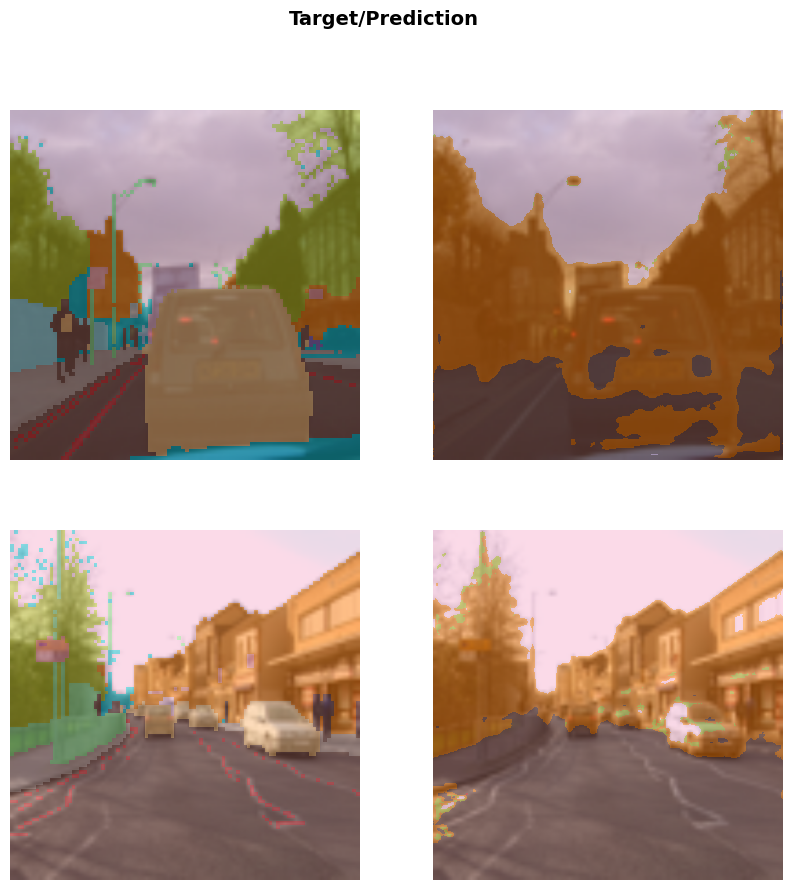

In [ ]:
learn.show_results(max_n=2, figsize=(10, 10))

In [ ]:
image_path = 'path/to/your/image.jpg'
img = PIL.Image.open(image_path)
pred_mask, _, _ = learn.predict(img)
pred_mask.show(figsize=(5, 5))

### **Potential Future Work**
---

Image segmentation is a challenging task that requires balancing model complexity, dataset size, and computation time. Here are some ideas for improving on these results:

* Training with the full CamVid dataset or another image segmentation dataset.

* Fine-tuning the pre-trained model. This project used a pre-trained ResNet34 as the backbone of the UNet model. However, there are many other pre-trained models available that may work better for this specific task. Consider trying a different model, such as ResNet50 or VGG16, and fine-tuning the model on the segmentation dataset.


<a name="p4"></a>

---
## **Part 4: Generating Wikipedia Entries**
---

In this section, you will apply what you learned about generating text by training a model on 30,000 sentences from Wikipedia as of 2021. This text has been downloaded from [https://wortschatz.uni-leipzig.de/en/download/English](https://wortschatz.uni-leipzig.de/en/download/English), which also contains the entries in several other languages as well as other corpora from the internet.

<br>


**Run the code provided below to import the dataset.**

In [ ]:
path = untar_data(URLs.WIKITEXT_TINY)
train_df = pd.read_csv(path/'train.csv', header=None, names=['text'])
dls = TextDataLoaders.from_df(train_df,
                              text_col='text',
                              is_lm=True,
                              valid_pct=0.1,
                              bs=64)

#### **Problem #4.1: Define a pre-trained language model learner**



You'll use the function `language_model_learner()` which works very similarly to `text_classifier_learner()`. Pass the following inputs to the model:
* `dls`
* `AWD_LSTM`
* `metrics=[accuracy, Perplexity()]`,
* `wd=0.1`

Finally, you can use a method called `to_fp16()` at the end of the model definition to have the model work in single precision, which can save a lot of training time.

In [ ]:
learn = language_model_learner(dls, AWD_LSTM, metrics=[accuracy, Perplexity()], wd=0.1).to_fp16()

#### **Problem #4.2: Train your model**


In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.213851,3.490750,0.379244,32.810551,03:12


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.156602,3.468580,0.379642,32.091148,03:42
1,3.085423,3.461913,0.379659,31.877890,03:29
2,3.079332,3.462044,0.379578,31.882076,02:53
3,3.015193,3.463581,0.380028,31.931120,03:09
4,2.964175,3.464574,0.379882,31.962835,03:21


If you are happy with your model, we recommend saving it so you don't have to re-train it again later. The code for saving the model is provided for you below.

In [ ]:
learn.save('fine_tuned_wikitext_tiny')

Path('models/fine_tuned_wikitext_tiny.pth')

Below is the code to load the model again. Only the model weights are saved, so when using `learn.load()` make sure you first define the model again.

In [ ]:
learn.load('fine_tuned_wikitext_tiny')

#### **Problem #4.3: Generate Text**


We have provided a function below that you can use to generate text. The inputs are:
* prompt -> A string that you want the model to generate text at the end of
* n_words -> The number of words the model should generate
* temperature -> A parameter that represents the amount of "randomness" in the model's response

**Run the cell below to set up the function.**

In [ ]:
def generate_text(prompt, n_words=20, temperature=1.0):
    return learn.predict(prompt, n_words, temperature=temperature)

In [ ]:
prompt = "Chicago is a place where"
predicted_text = generate_text(prompt,30,0.75)
print(predicted_text)

Chicago is a place where the city is depicted in the novel , in which the town is in Prague . 
▁
▁ = = History = = 
▁
▁ Sarnia is the oldest


### **Potential Future Work**
---

Text generation can be a tricky task that can be extremely dependent on the framing of the problem, the dataset available, the models used, and more. Consider some of the following ideas for improving on these results:

* Training with the full Wikitext dataset or another language model dataset.

* Hyperparameter tuning or using a different pre-trained model, maybe a transformer model.

* Can you think of how modify this code to make a chatbot?

# End of notebook
---
© 2023 The Coding School, All rights reserved